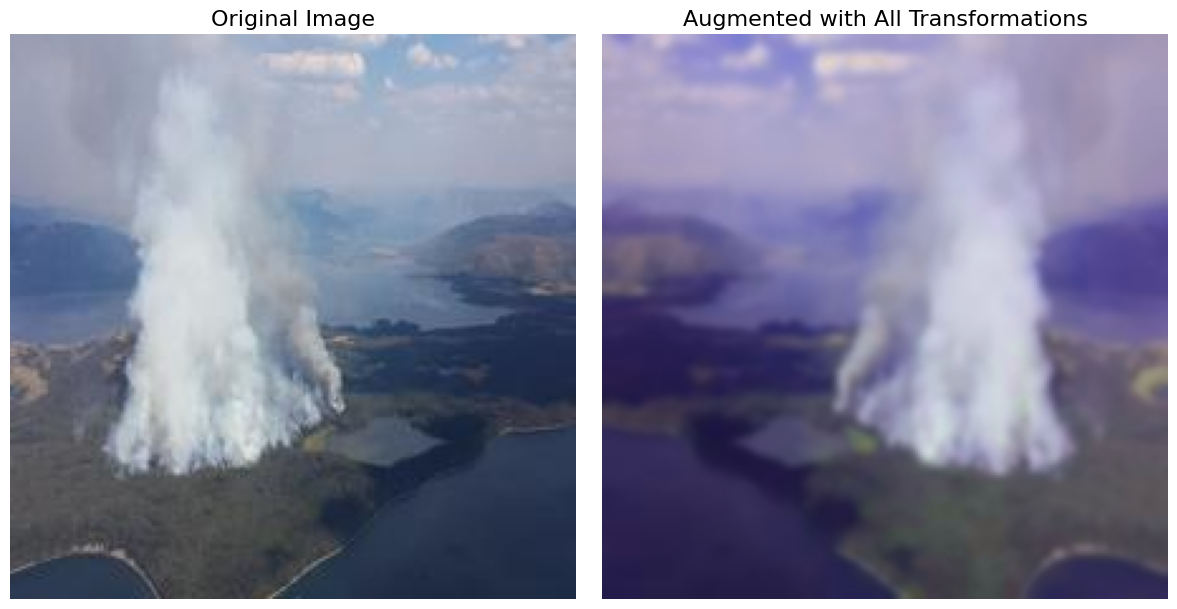

: 

In [ ]:
import cv2
import matplotlib.pyplot as plt
from albumentations import (
    Compose, Resize, HorizontalFlip, ShiftScaleRotate,
    RandomBrightnessContrast, RandomFog, GaussianBlur, CLAHE, HueSaturationValue, ColorJitter
)
import numpy as np
import os

def load_image(image_path):
    """Load an image from a given path."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def apply_augmentation(image, transform):
    """Apply a specific augmentation to an image."""
    augmented = transform(image=image)
    return augmented['image']

def plot_images(original_image, augmented_image, title):
    """Plot original and augmented images side by side."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(original_image)
    axes[0].set_title("Original Image", fontsize=16)
    axes[0].axis("off")

    axes[1].imshow(augmented_image)
    axes[1].set_title(title, fontsize=16)
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

# Specify the image path
image_path = r"C:\Users\Yash\Documents\Development\Projects\final_year\wildfire_dataset_scaled\train\fire\9570767551_c9ec5f7076_o.jpg"  # Replace with the path to your image

if not os.path.exists(image_path):
    print(f"Image path {image_path} does not exist. Please provide a valid path.")
else:
    original_image = load_image(image_path)

    # Define the combined augmentation pipeline
    transform = Compose([
        Resize(224, 224),
        HorizontalFlip(p=0.5),
        ShiftScaleRotate(shift_limit=0.02, scale_limit=0.02, rotate_limit=10, p=0.5),
        RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
        RandomFog(fog_coef_lower=0.1, fog_coef_upper=0.3, p=0.3),
        GaussianBlur(blur_limit=(3, 7), p=0.3),
        CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), p=0.3),
        HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),
        ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.3)
    ])
    title = "Augmented with All Transformations"

    # Apply the augmentation
    augmented_image = apply_augmentation(original_image, transform)

    # Plot original and augmented images
    plot_images(original_image, augmented_image, title)
